# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sasha Oyanadel 
- Nombre de alumno 2: Pablo Vergara

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.




### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]
La calibración de un modelo consiste en ajustar las probabilidades de salida $\hat{P} = f(X)$ para que reflejen correctamente la frecuencia real de la clase positiva. Un modelo está perfectamente calibrado si, para cualquier valor $p \in [0,1]$, se cumple que $\mathbb{P}(\hat{Y}=1 | \hat{P}=p) = p$.

Se utiliza para que las probabilidades predichas puedan interpretarse como verdaderas frecuencias de ocurrencia de la clase positiva. Así, si un conjunto de muestras tiene probabilidad predicha $p$, aproximadamente un $p \times 100%$ de ellas debería realmente pertenecer a la clase positiva.
La calibración es importante porque los modelos de machine learning suelen tener sesgos en su distribución de salidas. Aplicar calibración ayuda a mejorar la toma de decisiones y a interpretar de manera más confiable los scores generados por el modelo.

**Respuesta:**

# 1. Diferencia entre datos de entrenamiento y validación

Los datos de entrenamiento son el conjunto que se utiliza para ajustar los parámetros del modelo, mientras que los datos de validación sirven para evaluar el rendimiento del modelo durante el entrenamiento y ayudar a ajustar hiperparámetros, detectando posibles problemas como el sobreajuste.

---

# 2. Principal desafío en clasificación no supervisada

El principal desafío es la ausencia de etiquetas verdaderas. Sin etiquetas, el modelo debe inferir patrones o estructuras sin saber de antemano qué clases existen ni cuántas son. Esto dificulta validar la calidad de las agrupaciones encontradas y puede hacer complicada la interpretación de los resultados.

---

# 3. Matriz de confusión

La matriz de confusión es una tabla que resume el desempeño de un modelo de clasificación mostrando las cantidades de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN). Se utiliza para entender en detalle dónde está acertando o fallando el modelo, más allá de una simple medida como la accuracy.

---

# 4. Métricas de Clasificación

## Accuracy
**Fórmula:**
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
**Interpretación:**  
Mide el porcentaje de predicciones correctas sobre el total de casos. Es útil en datasets balanceados.

## Precision
**Fórmula:**
$$
Precision = \frac{TP}{TP + FP}
$$
**Interpretación:**  
De todas las predicciones positivas realizadas por el modelo, mide qué proporción eran realmente positivas.

## Recall
**Fórmula:**
$$
Recall = \frac{TP}{TP + FN}
$$
**Interpretación:**  
De todas las instancias realmente positivas, mide qué porcentaje fue correctamente identificado por el modelo.

## F1 Score
**Fórmula:**
$$
F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$
**Interpretación:**  
Es la media armónica entre precision y recall. Es útil cuando se busca un balance entre ambos, especialmente en problemas con clases desbalanceadas.

---

# 5. Métrica recomendada por contexto

## Mantenimiento predictivo de fallas de maquinaria pesada
**Métrica recomendada:** Recall  
**Justificación:** Es crítico detectar todas las fallas posibles para evitar fallas catastróficas.

## Detección de enfermedades altamente contagiosas
**Métrica recomendada:** Recall  
**Justificación:** Es fundamental identificar todos los casos positivos para controlar la propagación.

## Aprobación de créditos de alto riesgo
**Métrica recomendada:** Precision  
**Justificación:** Se busca asegurar que los aprobados realmente representen un bajo riesgo financiero.

## Detección de crímenes
**Métrica recomendada:** Recall  
**Justificación:** Es importante detectar la mayor cantidad posible de crímenes, aunque haya algunos falsos positivos.

---

# 6. Calibración de modelos

La calibración de un modelo consiste en ajustar las probabilidades de salida $\hat{P} = f(X)$ para que reflejen correctamente la frecuencia real de la clase positiva.  
Un modelo está perfectamente calibrado si, para cualquier valor $p \in [0,1]$, se cumple que:
$$
\mathbb{P}(\hat{Y}=1 | \hat{P}=p) = p
$$

Se utiliza para que las probabilidades predichas puedan interpretarse como verdaderas frecuencias de ocurrencia de la clase positiva. Así, si un conjunto de muestras tiene probabilidad predicha $p$, aproximadamente un $p \times 100\%$ de ellas debería realmente pertenecer a la clase positiva.  
La calibración es importante porque los modelos de machine learning suelen tener sesgos en su distribución de salidas. Aplicar calibración ayuda a mejorar la toma de decisiones y a interpretar de manera más confiable los scores generados por el modelo.

---


# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [21]:
import pandas as pd

df = pd.read_csv('stats_players.csv',sep=",")

df['label'] = df['National_Position'].notnull().astype(int)

print(df[['National_Position', 'label']].head())


  National_Position  label
0                LS      1
1                RW      1
2                LW      1
3                LS      1
4                GK      1


In [ ]:
label_counts = df['label'].value_counts()

print(label_counts)
print("\nPorcentaje por clase:")
print(label_counts / label_counts.sum() * 100)


label
0    16513
1     1075
Name: count, dtype: int64

Porcentaje por clase:
label
0    93.887878
1     6.112122
Name: count, dtype: float64


Se obtienen 16.513 jugadores no selccionados y 1.075 seleccionados, dando asi un gran desbalance de calse, como es posible visualizar en los porcentajes se tiene 94% de una clase y 6% de otra.

In [23]:
print(df.dtypes)


Name                 object
Nationality          object
National_Position    object
Club_Position        object
Height                int64
Weight                int64
Preffered_Foot       object
Age                   int64
Work_Rate            object
Weak_foot             int64
Skill_Moves           int64
Ball_Control          int64
Dribbling             int64
Marking               int64
Sliding_Tackle        int64
Standing_Tackle       int64
Aggression            int64
Reactions             int64
Interceptions         int64
Vision                int64
Composure             int64
Crossing              int64
Short_Pass            int64
Long_Pass             int64
Acceleration          int64
Speed                 int64
Stamina               int64
Strength              int64
Balance               int64
Agility               int64
Jumping               int64
Heading               int64
Shot_Power            int64
Finishing             int64
Long_Shots            int64
Curve               

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Listas de columnas
num_features = [
    'Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves',
    'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
    'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure',
    'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina',
    'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power',
    'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'
]

cat_features = [
    'Nationality', 'Preffered_Foot', 'Work_Rate'
]


# Definir el ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='drop'  
)


Se decide utilizar StandarScaler dado que centra los datos en media 0 y varianza 1 y dada la naturaleza de las estadisticas de los jugadores, además casi todas las variables numericas siguen una distribución normal. Además ayuda a que las variables numericas sean más comparables. y sobre las variables categoritas se decide utilizar un OneHotEncoder dado que el modelo no es capaz de procesar texto.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [ ]:
from sklearn.model_selection import train_test_split

# Definimos las features (X) y el target (y)
X = df.drop(columns=['label', 'Name', 'National_Position'])
y = df['label']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  
    random_state=42,  
    stratify=y  # Mantener proporción de clases
)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline  
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [31]:
# Pipeline con XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocessing', col_transformer),
    ('classifier', XGBClassifier( eval_metric='logloss', random_state=42))
])

# Pipeline con LightGBM
pipeline_lightgbm = Pipeline(steps=[
    ('preprocessing', col_transformer),
    ('classifier', LGBMClassifier(random_state=42))
])


In [32]:
# Entrenar pipeline con XGBoost
pipeline_xgboost.fit(X_train, y_train)

# Entrenar pipeline con LightGBM
pipeline_lightgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2676
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nationality',
                                                   'Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate'])])),
                ('classifier', LGBMClassifier(random_state=42))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicciones
y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

# Evaluación XGBoost
print("=== XGBoost Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgboost))
print("Classification Report:\n", classification_report(y_test, y_pred_xgboost))

# Evaluación LightGBM
print("\n=== LightGBM Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lightgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lightgbm))
print("Classification Report:\n", classification_report(y_test, y_pred_lightgbm))


=== XGBoost Metrics ===
Accuracy: 0.9488345650938033
Confusion Matrix:
 [[3256   47]
 [ 133   82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.64      0.38      0.48       215

    accuracy                           0.95      3518
   macro avg       0.80      0.68      0.72      3518
weighted avg       0.94      0.95      0.94      3518


=== LightGBM Metrics ===
Accuracy: 0.9502558271745309
Confusion Matrix:
 [[3266   37]
 [ 138   77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.68      0.36      0.47       215

    accuracy                           0.95      3518
   macro avg       0.82      0.67      0.72      3518
weighted avg       0.94      0.95      0.94      3518



d:\Escritorio\disco_nuevo\otoño 2025\laboratorio\20250423065686B8177ED48C80F7__Lab5\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


En primer lugar los valores coinciden con los de clasification_report

In [1]:
# Matriz de confusión de XGBoost
TN_xgb = 3256
FP_xgb = 47
FN_xgb = 133
TP_xgb = 82

# Accuracy, Precision, Recall para XGBoost
accuracy_xgb = (TP_xgb + TN_xgb) / (TP_xgb + TN_xgb + FP_xgb + FN_xgb)
precision_xgb = TP_xgb / (TP_xgb + FP_xgb)
recall_xgb = TP_xgb / (TP_xgb + FN_xgb)

print("=== XGBoost ===")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision (Clase 1): {precision_xgb:.4f}")
print(f"Recall (Clase 1): {recall_xgb:.4f}")


=== XGBoost ===
Accuracy: 0.9488
Precision (Clase 1): 0.6357
Recall (Clase 1): 0.3814


In [2]:
# Matriz de confusión de LightGBM
TN_lgbm = 3266
FP_lgbm = 37
FN_lgbm = 138
TP_lgbm = 77

# Accuracy, Precision, Recall para LightGBM
accuracy_lgbm = (TP_lgbm + TN_lgbm) / (TP_lgbm + TN_lgbm + FP_lgbm + FN_lgbm)
precision_lgbm = TP_lgbm / (TP_lgbm + FP_lgbm)
recall_lgbm = TP_lgbm / (TP_lgbm + FN_lgbm)

print("=== LightGBM ===")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"Precision (Clase 1): {precision_lgbm:.4f}")
print(f"Recall (Clase 1): {recall_lgbm:.4f}")


=== LightGBM ===
Accuracy: 0.9503
Precision (Clase 1): 0.6754
Recall (Clase 1): 0.3581


# Interpretación de resultados

## 1. Verificación de cálculos

Es posible observar que los resultados coinciden con los obtenidos usando `classification_report`.

---

## 2. Análisis de Accuracy, Precision y Recall

- **Accuracy (~95%)** es muy alto en ambos modelos.  
  Esto significa que, en general, los modelos predicen correctamente si un jugador es o no seleccionado.

- **PERO**: Como los seleccionados (`1`) son pocos comparados con los no seleccionados (`0`), este accuracy es un poco engañoso: acertar la mayoría de los "no seleccionados" basta para que el accuracy suba mucho.

- **Precision** en la clase 1 (64% para XGBoost, 68% para LightGBM) indica que cuando el modelo predice que un jugador será seleccionado, acierta alrededor del 64%-68% de las veces.

- **Recall** en la clase 1 (38% para XGBoost, 36% para LightGBM) es bastante bajo.  
  Esto significa que el modelo no logra capturar bien a todos los seleccionados reales: solo identifica correctamente entre un 36% y 38% de los verdaderos seleccionados nacionales.

### ¿Cómo influye la cantidad de ejemplos por clase?

- Como hay muchos más "no seleccionados" que "seleccionados", los modelos tienden a "jugar seguro" prediciendo que un jugador no será seleccionado.

- Esto **infla el accuracy**, pero **afecta negativamente el recall** para la clase de interés (los seleccionados).

- El desbalance en las clases hace que capturar a todos los seleccionados sea difícil, reduciendo el recall.

---

## 3. Métrica adecuada y mejor modelo

En este problema, nos interesa **encontrar correctamente a los seleccionados nacionales**.  
Es decir, **queremos un buen recall**.

Sin embargo, no podemos ignorar la **precision**: también importa que los que predigamos como seleccionados realmente lo sean.

Por ende:
- Deberíamos utilizar principalmente **Recall** para no dejar fuera a jugadores que realmente merecen ser seleccionados.
- **F1-score** (que combina precisión y recall) también sería una buena referencia secundaria.

### ¿Qué modelo es mejor?

- **XGBoost** tiene un recall levemente mejor (38% vs 36%), aunque su precision es un poco más baja (64% vs 68%).

- Como **recall** es más importante aquí, **XGBoost** es el modelo que tiene un **mejor desempeño** para este objetivo específico.

---


## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [ ]:
# Definimos los grupos
position_groups = {
    'ataque': ['ST', 'CF'],
    'central_ataque': ['RW', 'CAM', 'LW'],
    'central': ['RM', 'CM', 'LM'],
    'central_defensa': ['RWB', 'CDM', 'LWB'],
    'defensa': ['RB', 'CB', 'LB'],
    'arquero': ['GK']
}

# Función para mapear las posiciones
def map_position(pos):
    for label, positions in position_groups.items():
        if pos in positions:
            return label
    return None  

# Creamos un nuevo dataframe
df_position = df.copy()

# Aplicamos el mapeo
df_position['label'] = df_position['Club_Position'].apply(map_position)

# Eliminamos jugadores Sub y Res (y cualquier otro None)
df_position = df_position.dropna(subset=['label'])


In [45]:
# Conteo de ejemplos por clase
label_counts = df_position['label'].value_counts()

print("Cantidad de ejemplos por clase:")
print(label_counts)


Cantidad de ejemplos por clase:
label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64


La elección de modelos será la siguiente.
son más de 50 muestras, es clasificación, con labeled data, tenemos menos de 100k de muesteas, probamos linearSVC, luego no es texto, probamos Kneighbors finalmente usamos un ensemble.

=== LinearSVC Metrics ===
Accuracy: 0.7474619289340102

Classification Report:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.75      0.86      0.80        86
        central       0.61      0.64      0.63       182
 central_ataque       0.49      0.32      0.39       116
central_defensa       0.39      0.17      0.23        42
        defensa       0.82      0.97      0.89       236

       accuracy                           0.75       788
      macro avg       0.68      0.66      0.66       788
   weighted avg       0.72      0.75      0.73       788


Confusion Matrix:
[[126   0   0   0   0   0]
 [  0  74   7   5   0   0]
 [  0   8 117  27   7  23]
 [  0  16  57  37   3   3]
 [  0   1   6   3   7  25]
 [  0   0   4   3   1 228]]


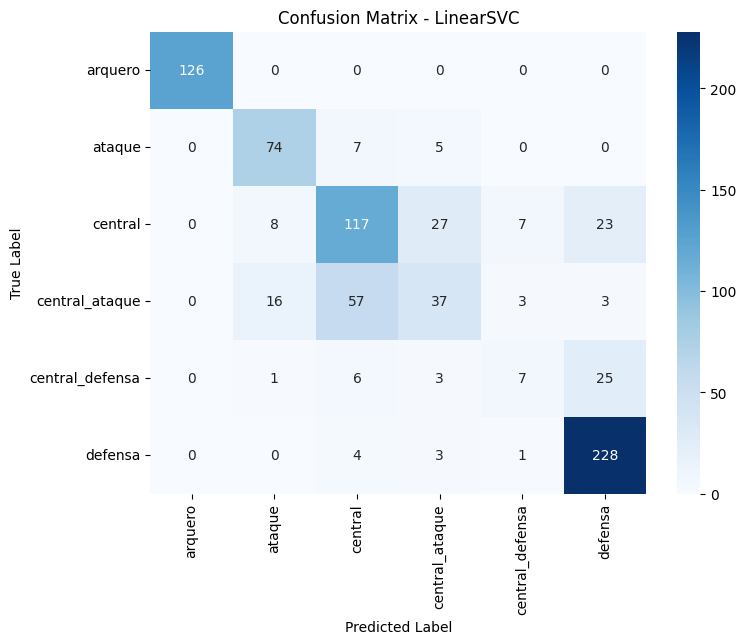

In [ ]:
# 1. Imports necesarios
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Definir X, y

X = df_position.drop(columns=['label', 'Name', 'National_Position', 'Club_Position'])
y = df_position['label']

# 3. Split en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Definir pipeline con LinearSVC
pipeline_linear_svc = Pipeline(steps=[
    ('preprocessing', col_transformer),  
    ('classifier', LinearSVC(random_state=42, max_iter=10000))  
])

# 5. Entrenar
pipeline_linear_svc.fit(X_train, y_train)

# 6. Predecir
y_pred = pipeline_linear_svc.predict(X_test)

# 7. Evaluar
print("=== LinearSVC Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 8. Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=pipeline_linear_svc.classes_,
            yticklabels=pipeline_linear_svc.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LinearSVC')
plt.show()


=== KNeighborsClassifier Metrics ===
Accuracy: 0.7284263959390863

Classification Report:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.69      0.81      0.75        86
        central       0.57      0.63      0.60       182
 central_ataque       0.51      0.30      0.38       116
central_defensa       0.39      0.17      0.23        42
        defensa       0.81      0.94      0.87       236

       accuracy                           0.73       788
      macro avg       0.66      0.64      0.64       788
   weighted avg       0.71      0.73      0.71       788


Confusion Matrix:
[[126   0   0   0   0   0]
 [  0  70  13   3   0   0]
 [  0  14 114  27   3  24]
 [  0  17  59  35   2   3]
 [  0   0   7   2   7  26]
 [  0   0   7   1   6 222]]


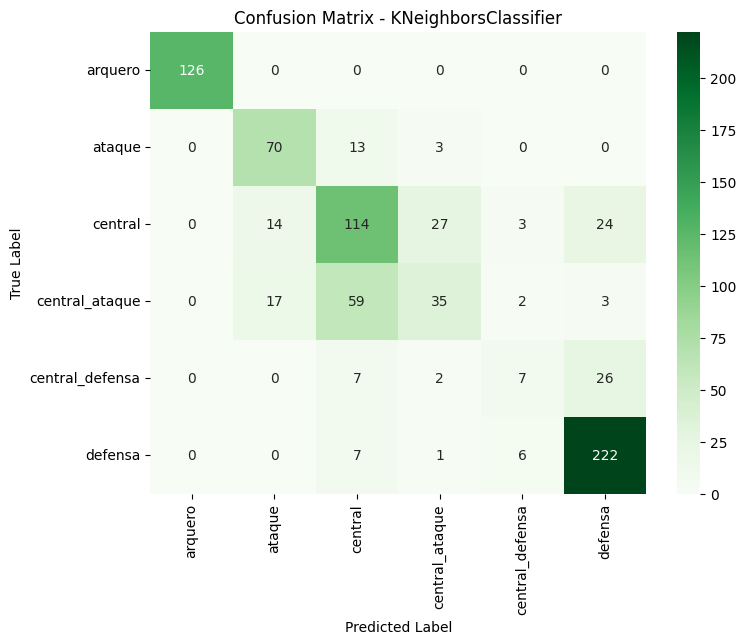

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# 4. Definir pipeline con KNeighbors
pipeline_knn = Pipeline(steps=[
    ('preprocessing', col_transformer), 
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])

# 5. Entrenar
pipeline_knn.fit(X_train, y_train)

# 6. Predecir
y_pred_knn = pipeline_knn.predict(X_test)

# 7. Evaluar
print("=== KNeighborsClassifier Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# 8. Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn),
            annot=True,
            fmt='d',
            cmap='Greens',
            xticklabels=pipeline_knn.classes_,
            yticklabels=pipeline_knn.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNeighborsClassifier')
plt.show()

=== RandomForestClassifier Metrics ===
Accuracy: 0.7385786802030457

Classification Report:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.77      0.84      0.80        86
        central       0.56      0.68      0.62       182
 central_ataque       0.51      0.25      0.34       116
central_defensa       0.40      0.05      0.09        42
        defensa       0.80      0.97      0.88       236

       accuracy                           0.74       788
      macro avg       0.67      0.63      0.62       788
   weighted avg       0.71      0.74      0.71       788


Confusion Matrix:
[[126   0   0   0   0   0]
 [  0  72  12   2   0   0]
 [  0  10 124  22   2  24]
 [  0  11  72  29   0   4]
 [  0   0   9   2   2  29]
 [  0   0   4   2   1 229]]


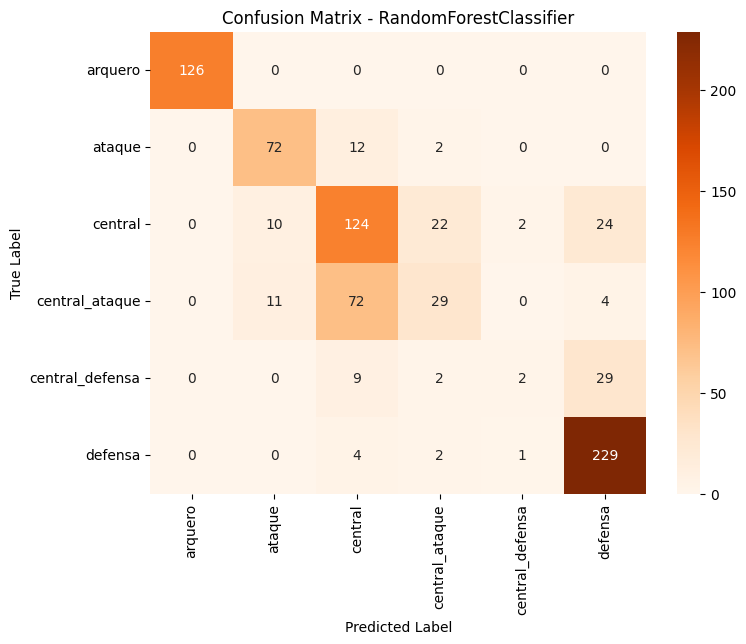

In [55]:
# 1. Imports necesarios
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Definir pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessing', col_transformer),  # el mismo col_transformer corregido
    ('classifier', RandomForestClassifier(random_state=42))
])

# 3. Entrenar
pipeline_rf.fit(X_train, y_train)

# 4. Predecir
y_pred_rf = pipeline_rf.predict(X_test)

# 5. Evaluar
print("=== RandomForestClassifier Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# 6. Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True,
            fmt='d',
            cmap='Oranges',
            xticklabels=pipeline_rf.classes_,
            yticklabels=pipeline_rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()


## 4. Comentario de resultados

- Ambos modelos tienen un **accuracy** similar, alrededor de 73%, pero RandomForest tiene un ligero mejor desempeño general (0.7386 vs 0.7284).

- **Arquero** es predicho perfectamente (100%) por ambos modelos, debido probablemente a que sus características son muy distintivas.

- **Defensa** también tiene buen desempeño (precision y recall altos).

- **Central**, **central_ataque** y especialmente **central_defensa** son clases más difíciles:
  - En KNeighborsClassifier, el recall para "central_defensa" es apenas 17%.
  - En RandomForestClassifier, el recall baja a solo 5% para "central_defensa".

- **Conclusión general:**  
  - RandomForestClassifier logra mejores resultados en precision y recall promedio.  
  - Sin embargo, todavía existen clases difíciles de predecir correctamente, probablemente debido al bajo número de muestras y/o la similitud de características entre clases "centrales".

---


## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

#Continuar código aquí

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>